In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
from scipy import stats
from scipy.stats import skew,norm
from subprocess import check_output
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [6]:
#Now let's import and put the train and test datasets in  pandas dataframe

train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")

In [7]:
##display the first five rows of the train dataset.
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:

print ("Size of train data after dropping Id: {}" .format(train.shape))
print ("Size of test data after dropping Id: {}" .format(test.shape))
train.describe()

Size of train data after dropping Id: (1460, 81)
Size of test data after dropping Id: (1459, 80)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


In [11]:
print ("Size of train data after dropping Id: {}" .format(train.shape))
print ("Size of test data after dropping Id: {}" .format(test.shape))

Size of train data after dropping Id: (1460, 80)
Size of test data after dropping Id: (1459, 79)


In [12]:
# Numeric and categorical features in the dataset
train.select_dtypes(include=[np.number]).columns, train.select_dtypes(include=[np.object]).columns


(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'H

%%HTML
<h1>Correlation Features</h1>

Let's look at some correlation features between features.

In [13]:
# Showing the numerical varibales with the highest correlation with 'SalePrice', sorted from highest to lowest
correlation = train.corr()
print(correlation['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


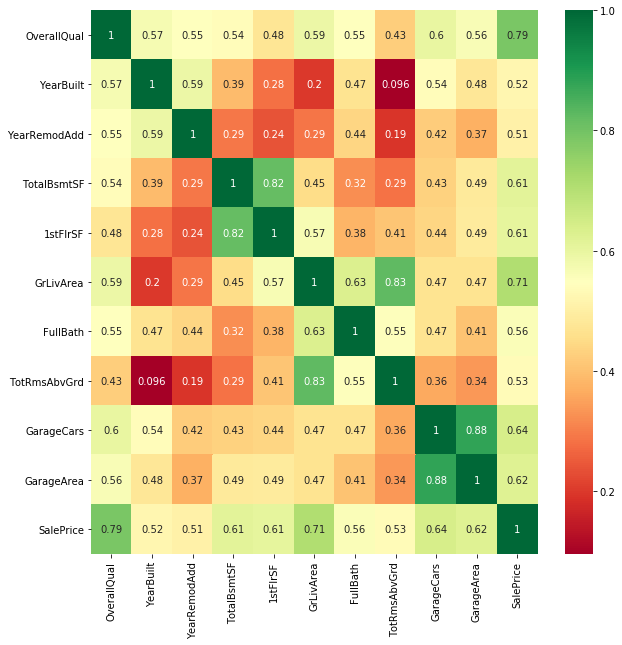

In [14]:
top_corr_features = correlation.index[abs(correlation['SalePrice'])>0.50]
plt.figure(figsize=(10,10))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

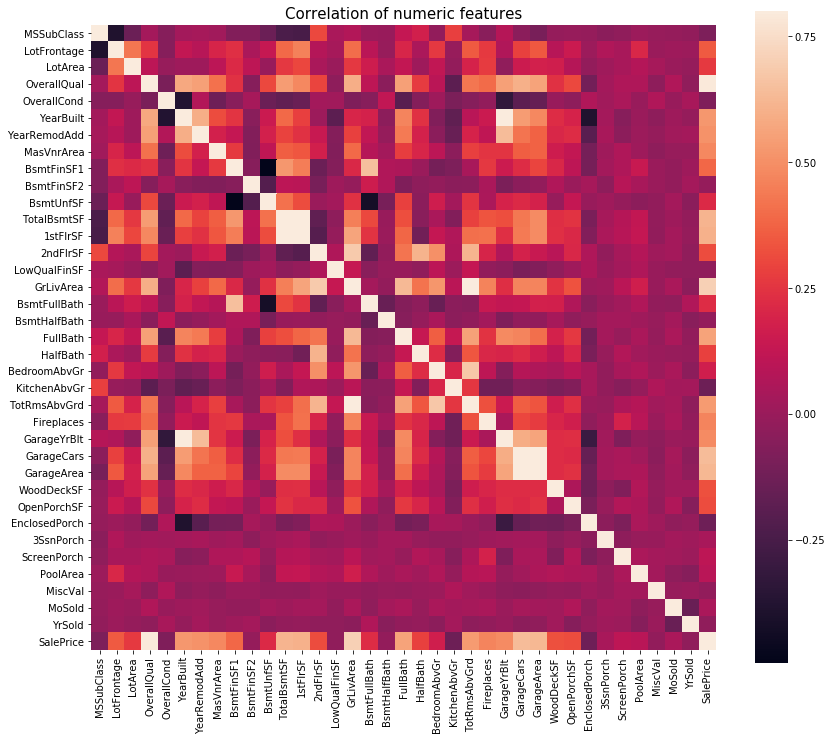

In [15]:
# Heatmap of correlation of numeric features
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numeric features',size=15)
sns.heatmap(correlation,square = True,  vmax=0.8)

* We observe two white squares (2,2 and 3,3) in the heatmap indicating high correlation. The first group of highly correlated variables is 'TotalBsmtSF' and '1stFlrSF'. The second group is 'GarageYrBlt', 'GarageCars' and 'GarageArea'. This indicates the presence of multicollinearity.
* The other four white squares (1,1) just indicate an obvious correlation between 'GarageYrBlt' and 'YearBuilt' and between 'TotRmsAbvGrd' and 'GrLivArea'
* We also observe from the heatmap and the previous correlation list that'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'FullBath', 'TotRmsAbvGrd' and 'YearBuilt' are highly correlated with 'SalePrice'

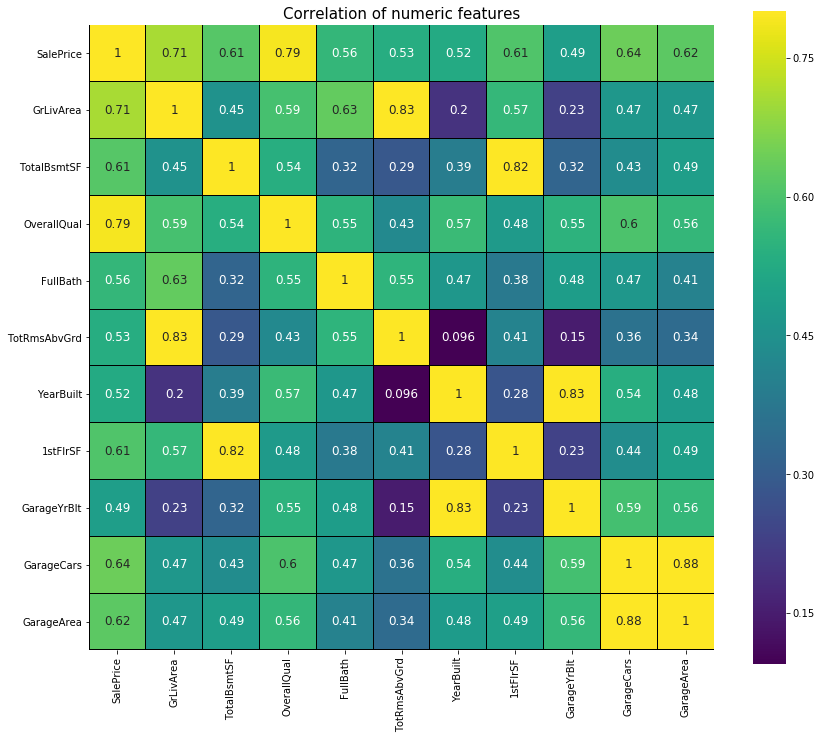

In [16]:
# Zoomed HeatMap of the most Correlayed variables
zoomedCorrelation = correlation.loc[['SalePrice','GrLivArea','TotalBsmtSF','OverallQual','FullBath','TotRmsAbvGrd','YearBuilt','1stFlrSF','GarageYrBlt','GarageCars','GarageArea'],
                                    ['SalePrice','GrLivArea','TotalBsmtSF','OverallQual','FullBath','TotRmsAbvGrd','YearBuilt','1stFlrSF','GarageYrBlt','GarageCars','GarageArea']]
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numeric features',size=15)
sns.heatmap(zoomedCorrelation, square = True, linewidths=0.01, vmax=0.8, annot=True,cmap='viridis',
            linecolor="black", annot_kws = {'size':12})

We conclude that :

* 'TotalBsmtSF' and '1stFlrSF' are strongly correlated
* 'TotRmsAbvGrd' and 'GrLivArea' are strongly correlated
* 'GarageCars' and 'GarageArea' are strongly correlated
* 'GarageYrBlt' and 'YearBuilt' are strongly correlated
* 'TotRmsAbvGrd' and 'GrLivArea' are strongly correlated
* 'OverallQual', 'GrLivArea' and 'TotRmsAbvGrd' are strongly correlated with 'SalePrice'

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


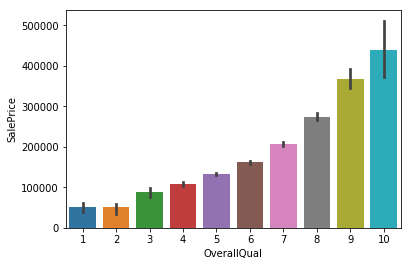

In [17]:
sns.barplot(train.OverallQual,train.SalePrice)

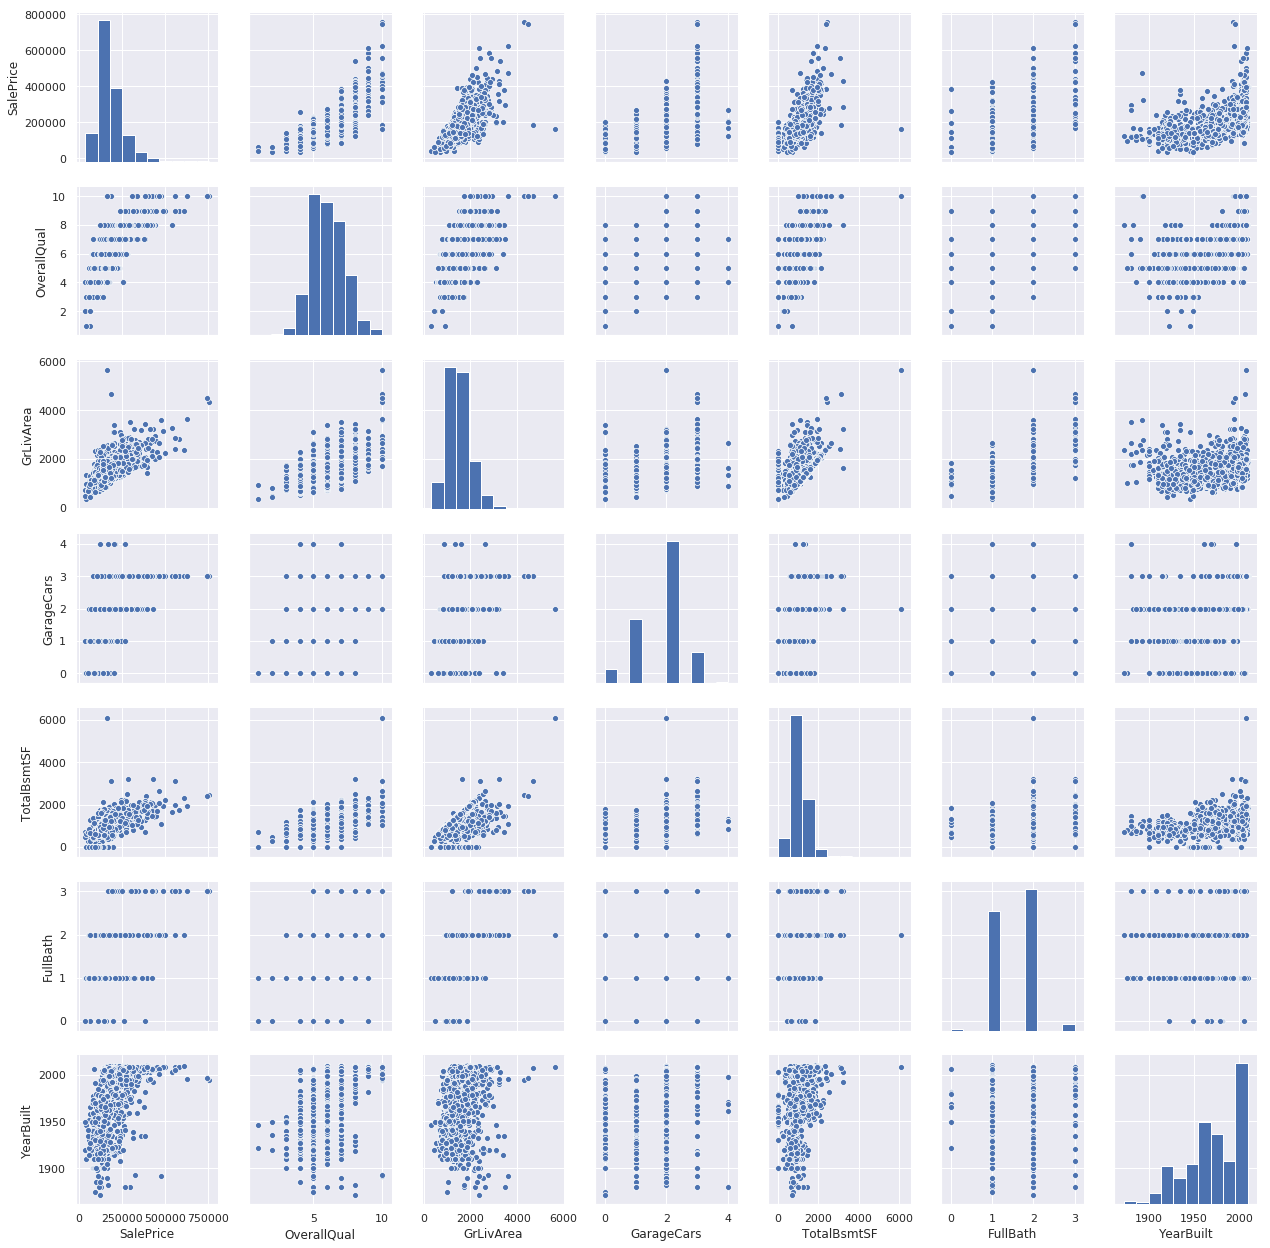

In [18]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train[cols],size=2.5)
plt.show()

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


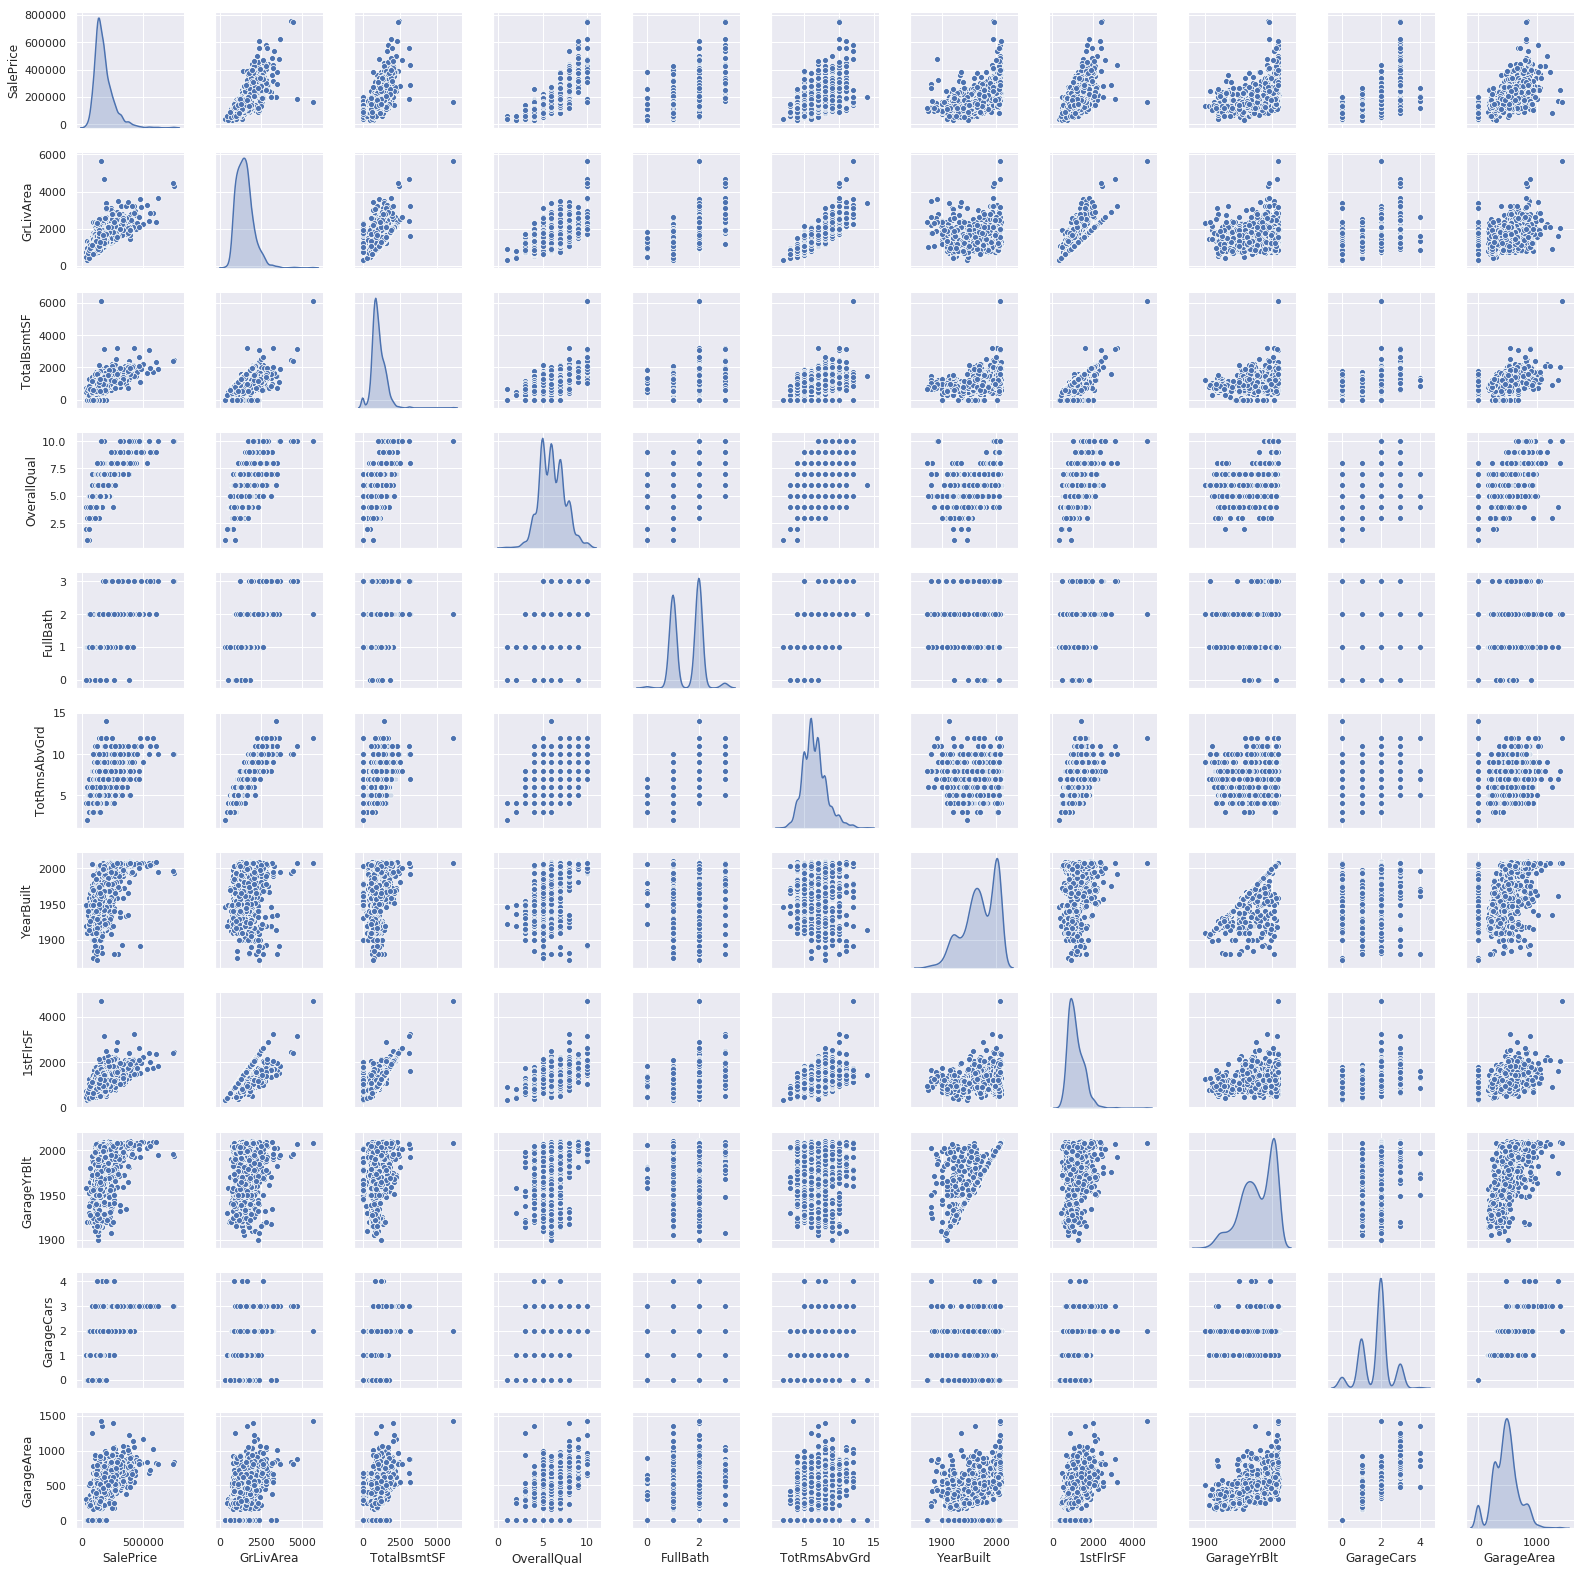

In [19]:
# Pair plot
sns.set()
cols = ['SalePrice','GrLivArea','TotalBsmtSF','OverallQual','FullBath','TotRmsAbvGrd','YearBuilt','1stFlrSF','GarageYrBlt','GarageCars','GarageArea']
sns.pairplot(train[cols],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

* We observe that 'SalePrice' increases almost quadratically with 'TotalBsmtSF', 'GrLivArea', '1stFlrSF'. So we conclude that the price of the houses increases quadratically with its surface area. We also observe that 'SalePrice' increases exponentially with 'OverallQual'.
* We also observe from 'GrLivArea'-'1stFlSF' and '1stFlSF'-'TotalBsmSF' that all the points are above the identity fucntion line, which means that the ground living area has the biggest surface of all floors, and that the first floor area is generally bigger than the basement area.
* We observe the same phenomenon for 'GarageYrBlt'-'YearBuilt'. which makes sense since we start building the garage after building the house, altough there are some exceptions in the data.

In [20]:
%%HTML
<h1>Removing Outliers</h1>

From the previous pair plots, we can see that there are outliers for 'TotalBsmtSF', '1stFlrSF' and 'GrLivArea'. Let's use the scatterplot to observe these outliers more precisely

Text(0.5,1,'GrLivArea')

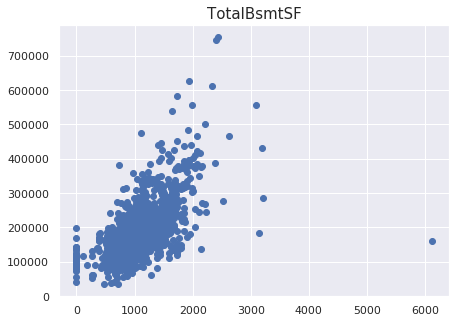

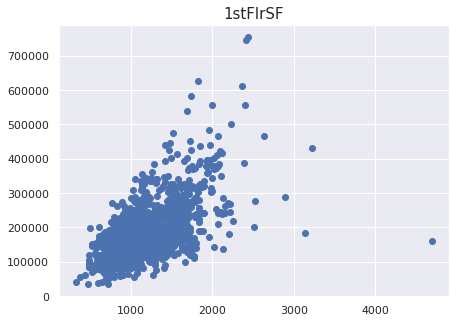

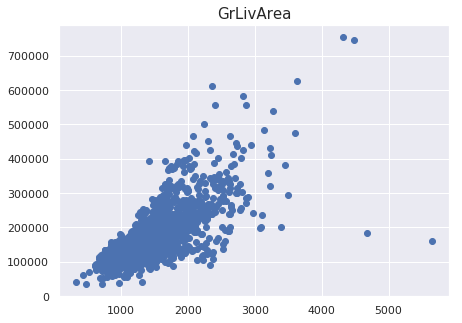

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(x = train.TotalBsmtSF,y = train.SalePrice)
plt.title('TotalBsmtSF', size = 15)
plt.figure(figsize=(7,5))
plt.scatter(x = train['1stFlrSF'],y = train.SalePrice)
plt.title('1stFlrSF', size = 15)
plt.figure(figsize=(7,5))
plt.scatter(x = train.GrLivArea,y = train.SalePrice)
plt.title('GrLivArea', size = 15)

In [22]:
#Removing outliners
train.drop(train[train['TotalBsmtSF']>5000].index,inplace=True)
train.drop(train[train['1stFlrSF']>4000].index,inplace=True)
train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index,inplace=True)
train.shape

(1458, 80)

In [23]:
%%HTML
<h1>Imputation of missing values</h1>

Let's look at the missing valeus in our data. We will be using msno library. Msno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset

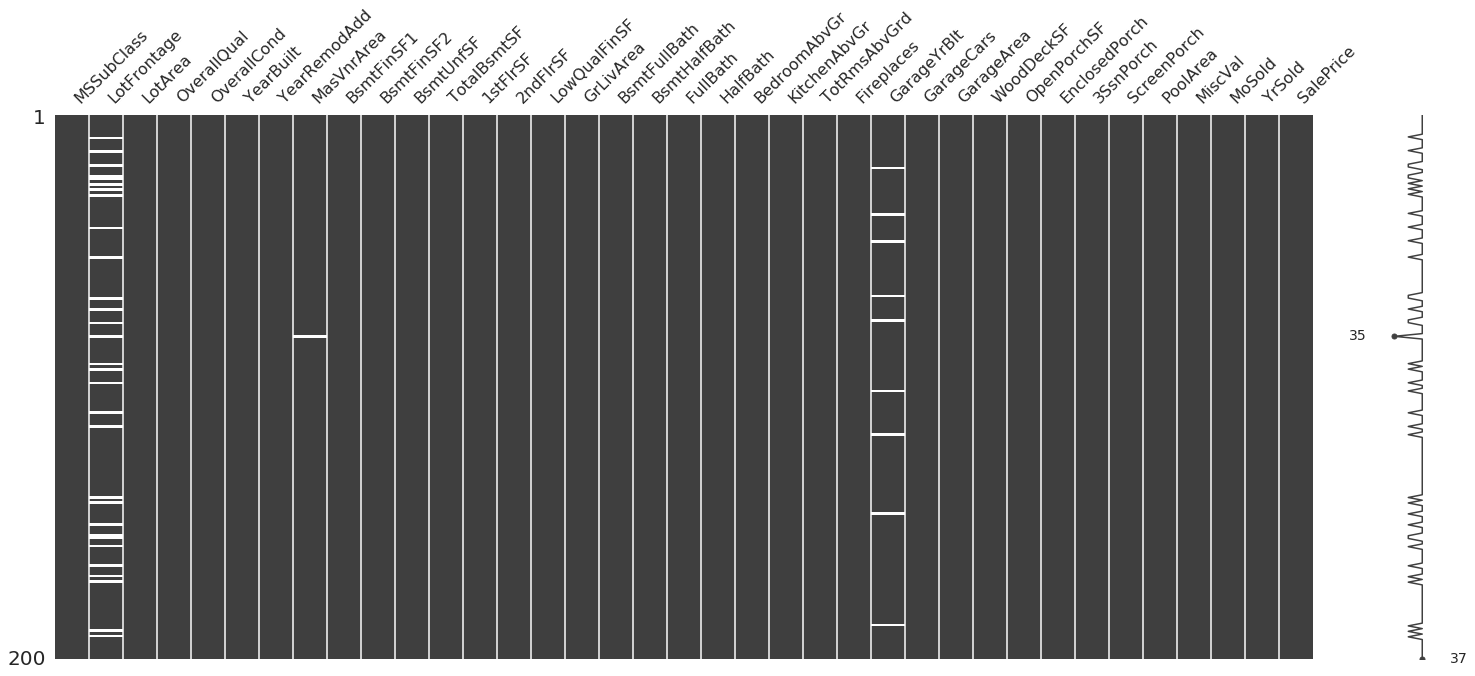

In [24]:
# Visualising missing values of numeric features for sample of 200
import missingno as msno # missing data visualizations and utilities
msno.matrix(train.select_dtypes(include=[np.number]).sample(200))

In [25]:
# Visualising percentage of missing values of the top 10 numeric variables
total = train.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)
percent = (train.select_dtypes(include=[np.number]).isnull().sum()/train.select_dtypes(include=[np.number]).isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Missing Count', 'Missing Percentage'])
missing_data.index.name =' Numeric Feature'
missing_data.head(10)

,Missing Count,Missing Percentage
Numeric Feature,,
LotFrontage,259,0.177641
GarageYrBlt,81,0.055556
MasVnrArea,8,0.005487
SalePrice,0,0.000000
BsmtUnfSF,0,0.000000
GrLivArea,0,0.000000
LowQualFinSF,0,0.000000
2ndFlrSF,0,0.000000
1stFlrSF,0,0.000000


We observe that 'LotFrontage', 'GarageYrBlt' and 'MasVnrArea' are the only one who have missing values

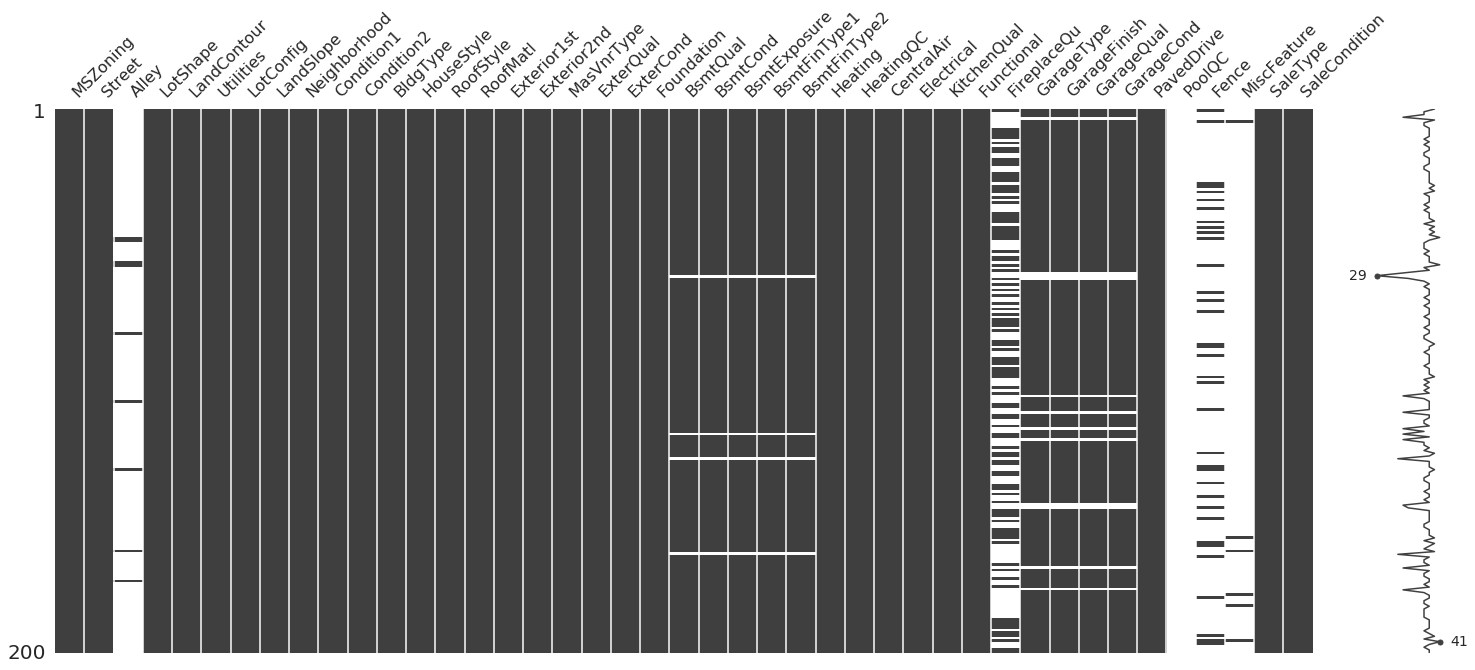

In [26]:
# Visualising missing values of categorical features for sample of 200
msno.matrix(train.select_dtypes(include=[np.object]).sample(200))

In [27]:
# Visualising percentage of missing values of the top 10 categorical variables
total = train.select_dtypes(include=[np.object]).isnull().sum().sort_values(ascending=False)
percent = (train.select_dtypes(include=[np.object]).isnull().sum()/train.select_dtypes(include=[np.object]).isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Missing Count', 'Missing Percentage'])
missing_data.index.name =' Numeric Feature'
missing_data.head(10)

,Missing Count,Missing Percentage
Numeric Feature,,
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
GarageCond,81,0.055556
GarageQual,81,0.055556
GarageFinish,81,0.055556
GarageType,81,0.055556


We observe that 'PoolQC', 'MiscFeature', 'Alley', 'Fence' and 'FireplaceQu' have a significant amount of missing values (at least more than half of observation)

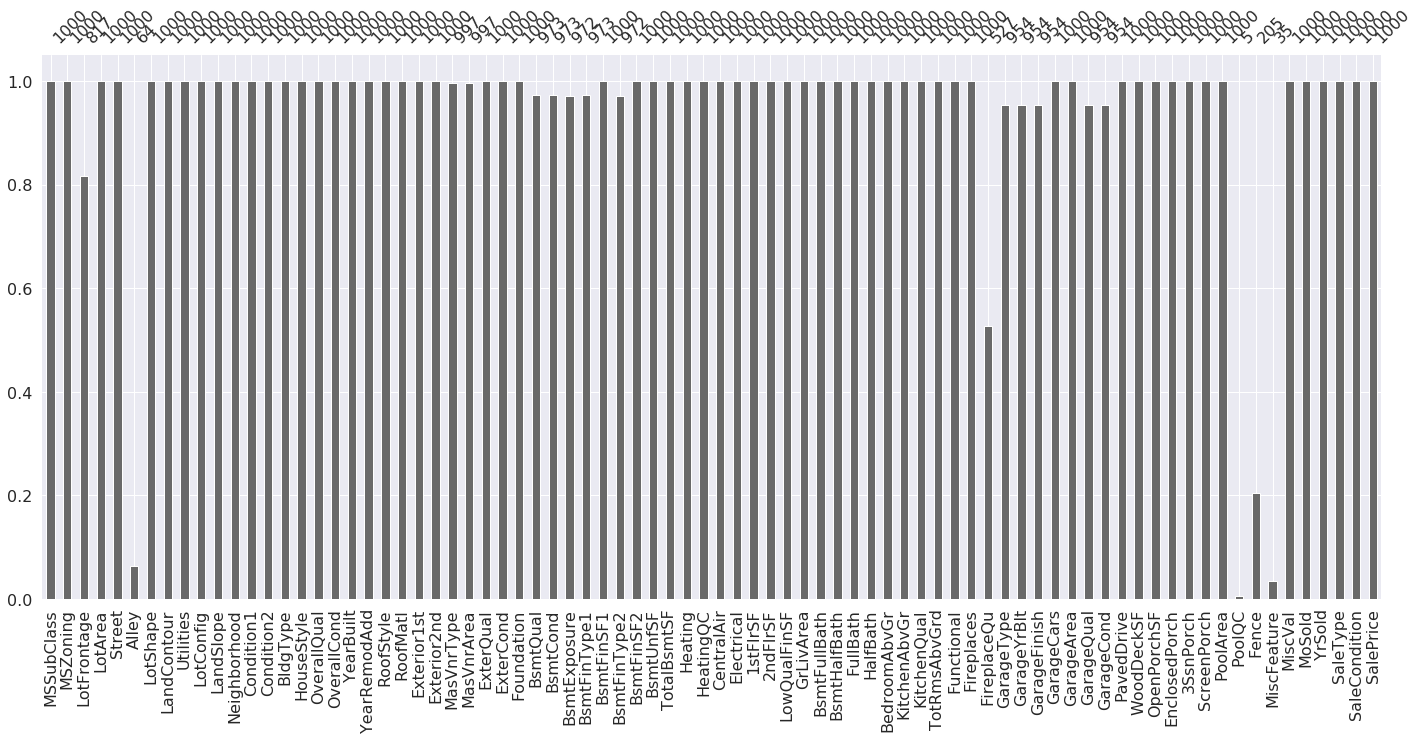

In [28]:
# Visualization of nullity by column
msno.bar(train.sample(1000))

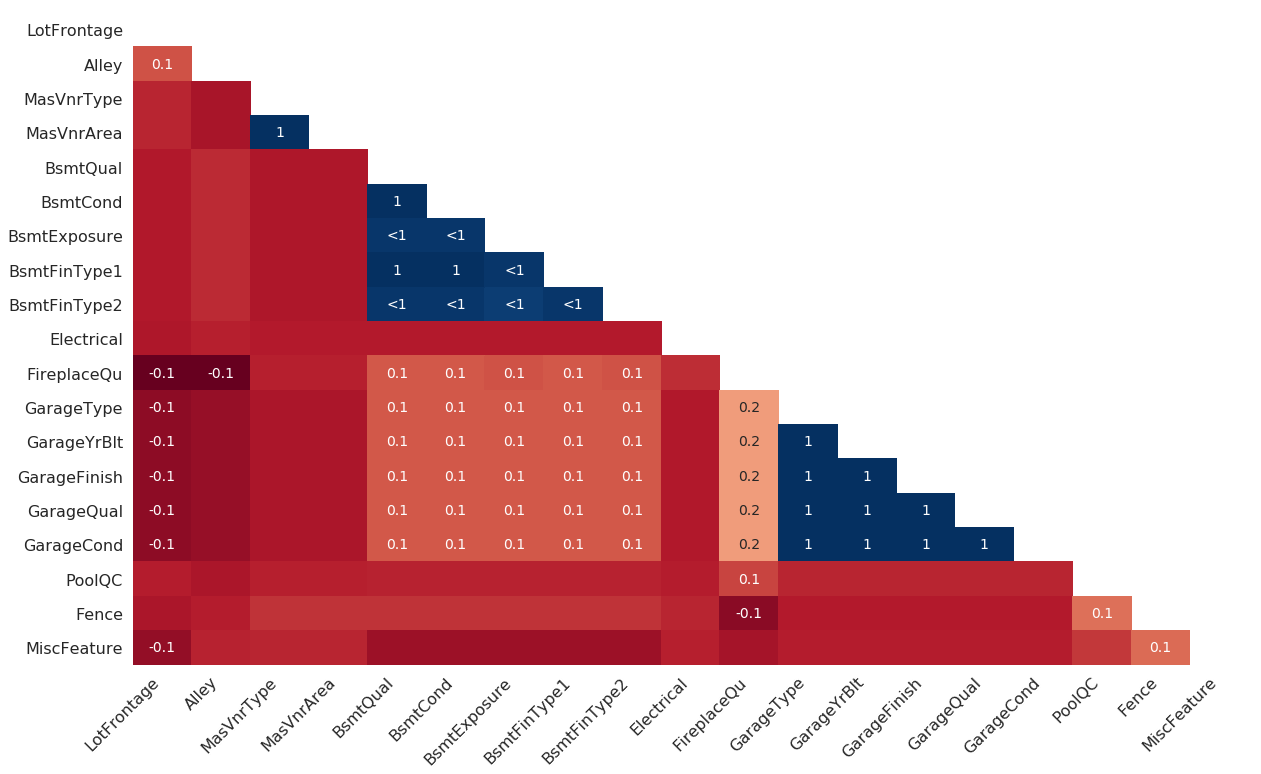

In [29]:
# Nullity correlation heatmap : how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(train)

# -1 : if one variable appears the other definitely does not
# 0 : variables appearing or not appearing have no effect on one another 
# 1 : if one variable appears the other definitely also does

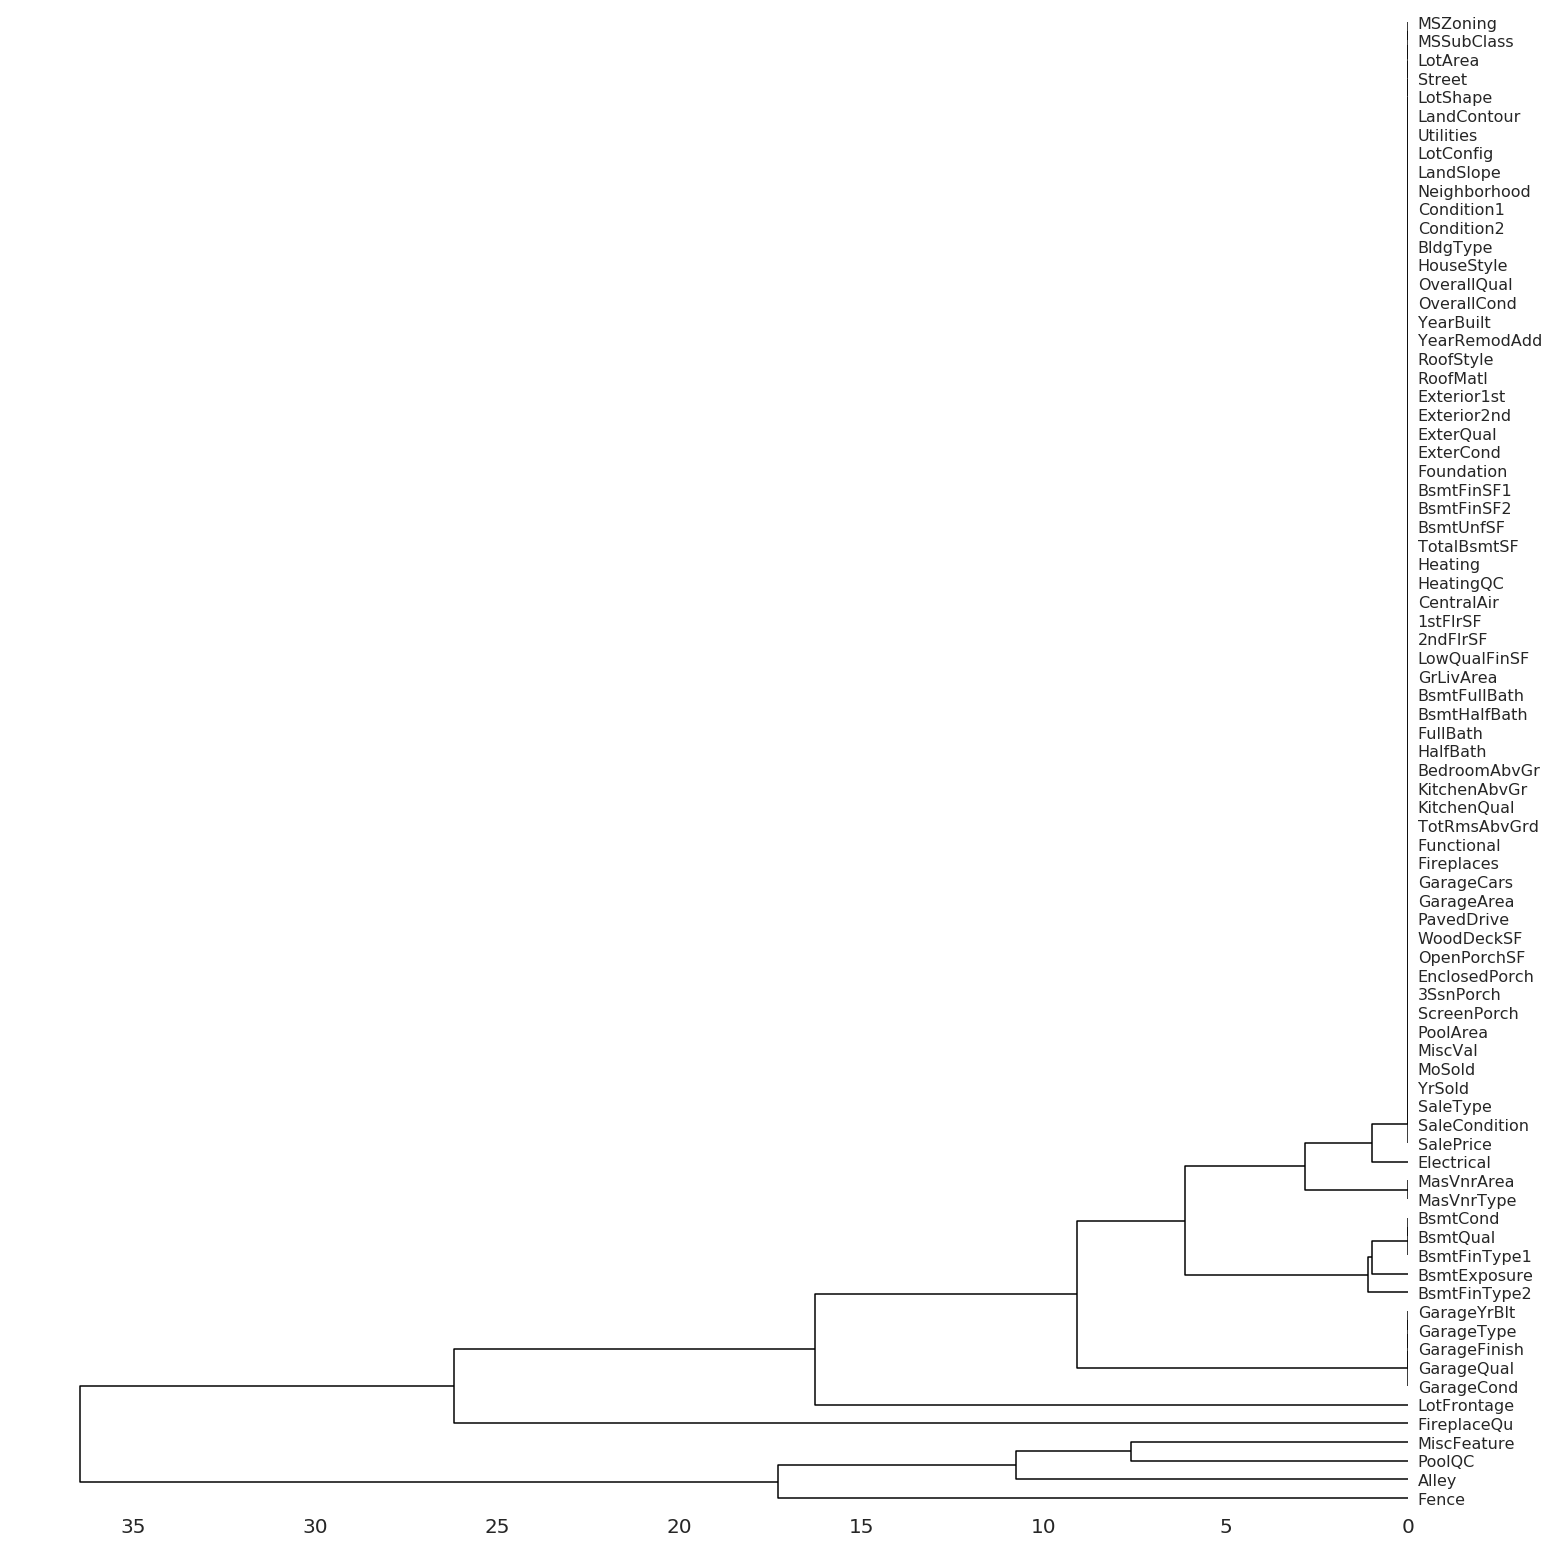

In [30]:
# Dendogram for variable completion, reveals trends deeper than the pairwise ones visible in the correlation heatmap
msno.dendrogram(train)

Cluster leaves which linked together at a distance of zero fully predict one another's presence : one variable might always be empty when another is filled, or they might always both be filled or both empty.

First of all, let's start by replacing the missing values in both the training and the test set. So we will be combining both datasets into one dataset

In [31]:
# Concatenate the training and test datasets into a single datafram
dataFull = pd.concat([train,test],ignore_index=True)
#dataFull.drop('Id',axis = 1,inplace = True)
dataFull.shape

(2917, 80)

In [32]:
# Sum of missing values by feature
sumMissingValues= dataFull.isnull().sum()
sumMissingValues[sumMissingValues>0].sort_values(ascending=False)


PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64

We impute them by proceeding sequentially through features with missing values

In [34]:
# Impute features with more than five missing values

# Categorical features : replace all with 'None'
for col in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageQual','GarageCond','GarageFinish','GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType']:
    dataFull[col].fillna('None',inplace = True)

# Check if missing values are imputed successfully
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Exterior1st        1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
GarageArea         1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
KitchenQual        1
SaleType           1
BsmtFinSF1         1
dtype: int64

In [35]:
# Categorical features : replace with the mode (most frequently occured value)
for col in ['MSZoning','Functional','Utilities','KitchenQual','SaleType','Exterior2nd','Exterior1st','Electrical']:
    dataFull[col].fillna(dataFull[col].mode()[0],inplace= True)

# Check if missing values are imputed successfully
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
GarageCars         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

In [36]:
# Numeric features : replace with 0
for col in ['BsmtFullBath','BsmtHalfBath','BsmtUnfSF','TotalBsmtSF','GarageCars','BsmtFinSF2','BsmtFinSF1','GarageArea']:
    dataFull[col].fillna(0,inplace= True)

# Check if missing values are imputed successfully
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

SalePrice      1459
LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
dtype: int64

In [37]:
dataFull['MasVnrArea'].fillna(dataFull['MasVnrArea'].mean(), inplace=True)

# Check if missing values are imputed successfully
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

SalePrice      1459
LotFrontage     486
GarageYrBlt     159
dtype: int64

Based on the previous correlation heatmap, 'GarageYrBlt' is highly correlated with 'YearBuilt', so let's replace the missing values by medians of 'YearBuilt'. To do that, we need to cut 'YearBuilt' into sections since it is a numeric variable

In [38]:
# Cut 'YearBuilt' into 10 parts
dataFull['YearBuiltCut'] = pd.qcut(dataFull.YearBuilt,10)
# Impute the missing values of 'GarageYrBlt' based on the median of 'YearBuilt' 
dataFull['GarageYrBlt']= dataFull.groupby(['YearBuiltCut'])['GarageYrBlt'].transform(lambda x : x.fillna(x.median()))
# convert the values to integers
dataFull['GarageYrBlt'] = dataFull['GarageYrBlt'].astype(int)
# Drop 'YearBuiltCut' column
dataFull.drop('YearBuiltCut',axis=1,inplace=True)
# Check if missing values are imputed successfully
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

SalePrice      1459
LotFrontage     486
dtype: int64

In [39]:
# Cut 'LotArea' into 10 parts
dataFull['LotAreaCut'] = pd.qcut(dataFull.LotArea,10)
# Impute the missing values of 'LotFrontage' based on the median of 'LotArea' and 'Neighborhood'
dataFull['LotFrontage']= dataFull.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))
dataFull['LotFrontage']= dataFull.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))
# Drop 'LotAreaCut' column
dataFull.drop('LotAreaCut',axis=1,inplace=True)

# Check if missing values are imputed successfully
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

SalePrice    1459
dtype: int64

The only missing values that are left are within SalePrice, which is exactly the number of lignes in the test data (the values that we need to predict)

%%HTML
<h1>Correcting Features</h1>

If we take a look at the numeric variables, we see that some of them obviously don't make a sense being numerical like year related features. Let's take a closer look at each one of them in the data description file and see which ones need to be converted to categorical type.

In [40]:
dataFull.select_dtypes(include=[np.number]).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [41]:
# Converting numeric features to categorical features
strCols = ['YrSold','YearRemodAdd','YearBuilt','MoSold','MSSubClass','GarageYrBlt']
for i in strCols:
    dataFull[i]=dataFull[i].astype(str)

%%HTML
<h1>Adding Features</h1>

First, we will map some categorical variable that represent some sort of rating to an integer score

In [42]:
dataFull.select_dtypes(include=[np.object]).columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MoSold', 'Neighborhood', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [43]:
dataFull["oExterQual"] = dataFull.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
dataFull["oBsmtQual"] = dataFull.BsmtQual.map({'None':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
dataFull["oBsmtExposure"] = dataFull.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
dataFull["oHeatingQC"] = dataFull.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
dataFull["oKitchenQual"] = dataFull.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
dataFull["oFireplaceQu"] = dataFull.FireplaceQu.map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
dataFull["oGarageFinish"] = dataFull.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
dataFull["oPavedDrive"] = dataFull.PavedDrive.map({'N':1, 'P':2, 'Y':3})

Next, we will add up some numeric features with each other to create new features that make sense



In [44]:
dataFull.select_dtypes(include=[np.number]).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'oExterQual', 'oBsmtQual', 'oBsmtExposure',
       'oHeatingQC', 'oKitchenQual', 'oFireplaceQu', 'oGarageFinish',
       'oPavedDrive'],
      dtype='object')

In [45]:
dataFull['HouseSF'] = dataFull['1stFlrSF'] + dataFull['2ndFlrSF'] + dataFull['TotalBsmtSF']
dataFull['PorchSF'] = dataFull['3SsnPorch'] + dataFull['EnclosedPorch'] + dataFull['OpenPorchSF'] + dataFull['ScreenPorch']
dataFull['TotalSF'] = dataFull['HouseSF'] + dataFull['PorchSF'] + dataFull['GarageArea']

%%HTML
<h1>Skewness and Kurtosis</h1>

In [46]:
# Estimate Skewness and Kurtosis of the data
train.skew(), train.kurt()

(MSSubClass        1.407011
 LotFrontage       1.543043
 LotArea          12.573925
 OverallQual       0.200786
 OverallCond       0.691035
 YearBuilt        -0.612295
 YearRemodAdd     -0.501838
 MasVnrArea        2.687784
 BsmtFinSF1        0.764789
 BsmtFinSF2        4.251925
 BsmtUnfSF         0.920903
 TotalBsmtSF       0.511703
 1stFlrSF          0.887637
 2ndFlrSF          0.812957
 LowQualFinSF      9.004955
 GrLivArea         1.010992
 BsmtFullBath      0.590358
 BsmtHalfBath      4.100114
 FullBath          0.031271
 HalfBath          0.680051
 BedroomAbvGr      0.212325
 KitchenAbvGr      4.484883
 TotRmsAbvGrd      0.660502
 Fireplaces        0.632060
 GarageYrBlt      -0.648137
 GarageCars       -0.342377
 GarageArea        0.131748
 WoodDeckSF        1.545805
 OpenPorchSF       2.339829
 EnclosedPorch     3.087164
 3SsnPorch        10.297106
 ScreenPorch       4.118929
 PoolArea         15.948945
 MiscVal          24.460085
 MoSold            0.215432
 YrSold            0

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


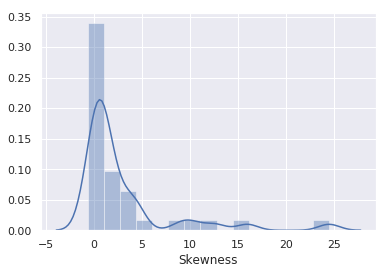

In [47]:
# Plot the Skewness of the data
sns.distplot(train.skew(),axlabel ='Skewness')

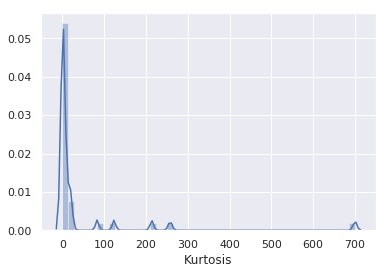

In [48]:
# Plot the Kurtosis of the data
sns.distplot(train.kurt(),axlabel ='Kurtosis')

There isn't much kurtosis in the data columns, but Skewness is very present, meaning that distribution is not symetrical

%%HTML
<h1>Label Encoding</h1>

For this section we will use Pipelines which are a way to streamline a lot of the routine processes. It provides a way to take code, fit it to the training data, apply it to the test data without having to copy and paste everything. We will create three classes : first for label encoding, second for skewness, and third for one hot label encoding.

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder, Imputer
from scipy.stats import skew

# Label encoding class
class labenc(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        label = LabelEncoder()
        X['YrSold']=label.fit_transform(X['YrSold'])
        X['YearRemodAdd']=label.fit_transform(X['YearRemodAdd'])
        X['YearBuilt']=label.fit_transform(X['YearBuilt'])
        X['MoSold']=label.fit_transform(X['MoSold'])
        X['GarageYrBlt']=label.fit_transform(X['GarageYrBlt'])
        return X
    
# Skewness transform class
class skewness(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        skewness = X.select_dtypes(include=[np.number]).apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= 1].index
        X[skewness_features] = np.log1p(X[skewness_features])
        return X

# One hot encoding class
class onehotenc(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X = pd.get_dummies(X)
        return X

In [50]:
# Creating a copy of the full dataset
dataFullCopy = dataFull.copy()

# Creating a new fata with aplied transformations using sklearn Pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('labenc',labenc()),('skewness',skewness()),('onehotenc',onehotenc())])
dataPipeline = pipeline.fit_transform(dataFullCopy)
dataFull.shape, dataPipeline.shape

((2917, 91), (2917, 328))

We can see now that the number of features increases from 88 to 328

In [51]:
dataPipeline.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,oExterQual,oBsmtQual,oBsmtExposure,oHeatingQC,...,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.753438,854,0.0,3,706.0,0.0,1.0,0.000000,150.0,0.000000,0,2,548.0,2.0,94,7.444833,1,0.693147,9.042040,65.0,0.0,5.283204,0.0,4,4.127134,5,7,0.0,208500.0,0.0,8,856.0,0.000000,110,53,2,3,4,1.098612,5,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,7.141245,0,0.0,3,978.0,0.0,0.0,0.693147,284.0,0.000000,1,2,460.0,2.0,67,7.141245,0,0.693147,9.169623,80.0,0.0,0.000000,0.0,7,0.000000,8,6,0.0,181500.0,0.0,6,1262.0,5.700444,83,26,1,2,4,1.609438,5,...,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,6.825460,866,0.0,3,486.0,0.0,1.0,0.000000,434.0,0.000000,1,2,608.0,2.0,92,7.488294,1,0.693147,9.328212,68.0,0.0,5.093750,0.0,11,3.761200,5,7,0.0,223500.0,0.0,6,920.0,0.000000,108,52,2,3,4,1.386294,5,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,6.869014,756,0.0,3,216.0,0.0,1.0,0.000000,540.0,5.609472,1,1,642.0,3.0,89,7.448916,0,0.693147,9.164401,60.0,0.0,0.000000,0.0,4,3.583519,5,7,0.0,140000.0,0.0,7,756.0,0.000000,25,20,0,2,3,1.098612,4,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,7.044033,1053,0.0,4,655.0,0.0,1.0,0.000000,490.0,0.000000,1,2,836.0,3.0,91,7.695758,1,0.693147,9.565284,84.0,0.0,5.860786,0.0,3,4.442651,5,8,0.0,250000.0,0.0,9,1145.0,5.262690,107,50,2,3,4,1.386294,5,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


Now we split the data to training and testing datasets

In [52]:

X_train = dataPipeline[:train.shape[0]]
y_train = X_train['SalePrice']
X_train.drop(columns = 'SalePrice', inplace=True)
X_test = dataPipeline[train.shape[0]:]
X_test.drop(columns = 'SalePrice', inplace=True)
X_train.shape, y_train.shape, X_test.shape

((1458, 327), (1458,), (1459, 327))

%%HTML
<h1>Transformation and Scaling</h1>

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


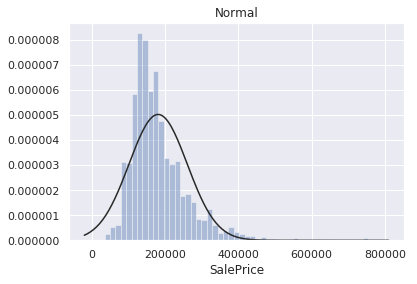

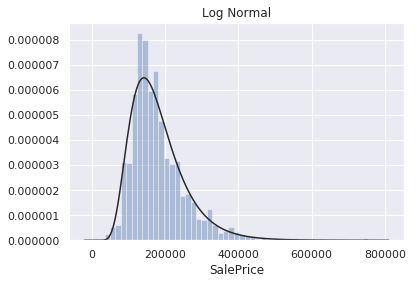

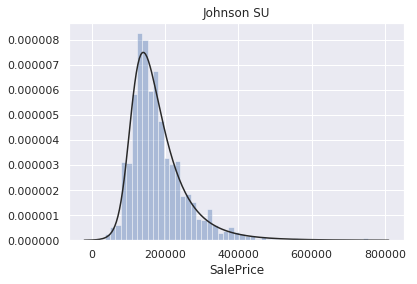

In [53]:
# SalesPrices plot with three different fitted distributions
import scipy.stats as st # statistics
plt.figure(2); plt.title('Normal')
sns.distplot(y_train, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y_train, kde=False, fit=st.lognorm)
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y_train, kde=False, fit=st.johnsonsu)

Normal distribution doesn't fit, so SalePrice need to be transformed before creating the model. Best fit is unbounded Johnson distribution, altough log normal distribution also fits well

In [54]:
# transforming 'SalePrice' into normal distribution
y_train_transformed = np.log(y_train)
y_train_transformed.skew(), y_train_transformed.kurt()

(0.12156821443518166, 0.8047636129011364)

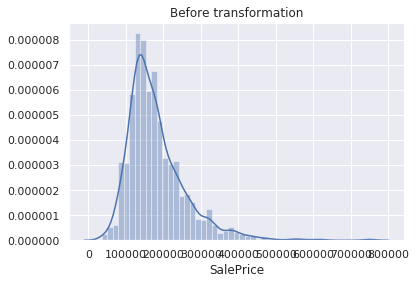

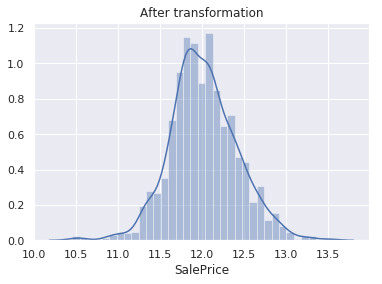

In [55]:
# plotting 'SalePrice' before and after the transformation
plt.figure(1); plt.title('Before transformation')
sns.distplot(y_train)
plt.figure(2); plt.title('After transformation')
sns.distplot(y_train_transformed)

In [56]:
# Using Robust Scaler to transform X_train
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit(X_train).transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

In [57]:
# Shape of final data we will be working on
X_train_scaled.shape, y_train_transformed.shape, X_test_scaled.shape

((1458, 327), (1458,), (1459, 327))

%%HTML
<h1>Feature Selection</h1>

We will use lasso regression (l1 regularization method). Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. We can also use it to find the most important features in our dataset.

In [58]:
# Display features by their importance (lasso regression coefficient)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train_scaled,y_train_transformed)
y_pred_lasso = lasso.predict(X_test_scaled)
lassoCoeff = pd.DataFrame({"Feature Importance":lasso.coef_}, index=dataPipeline.drop(columns = 'SalePrice').columns)
lassoCoeff.sort_values("Feature Importance",ascending=False)

,Feature Importance
TotalSF,0.125397
OverallQual,0.108795
YearBuilt,0.096755
Neighborhood_Crawfor,0.083168
GrLivArea,0.068799
Functional_Typ,0.053427
OverallCond,0.045123
Exterior1st_BrkFace,0.042848
Condition1_Norm,0.039360
SaleType_New,0.037983


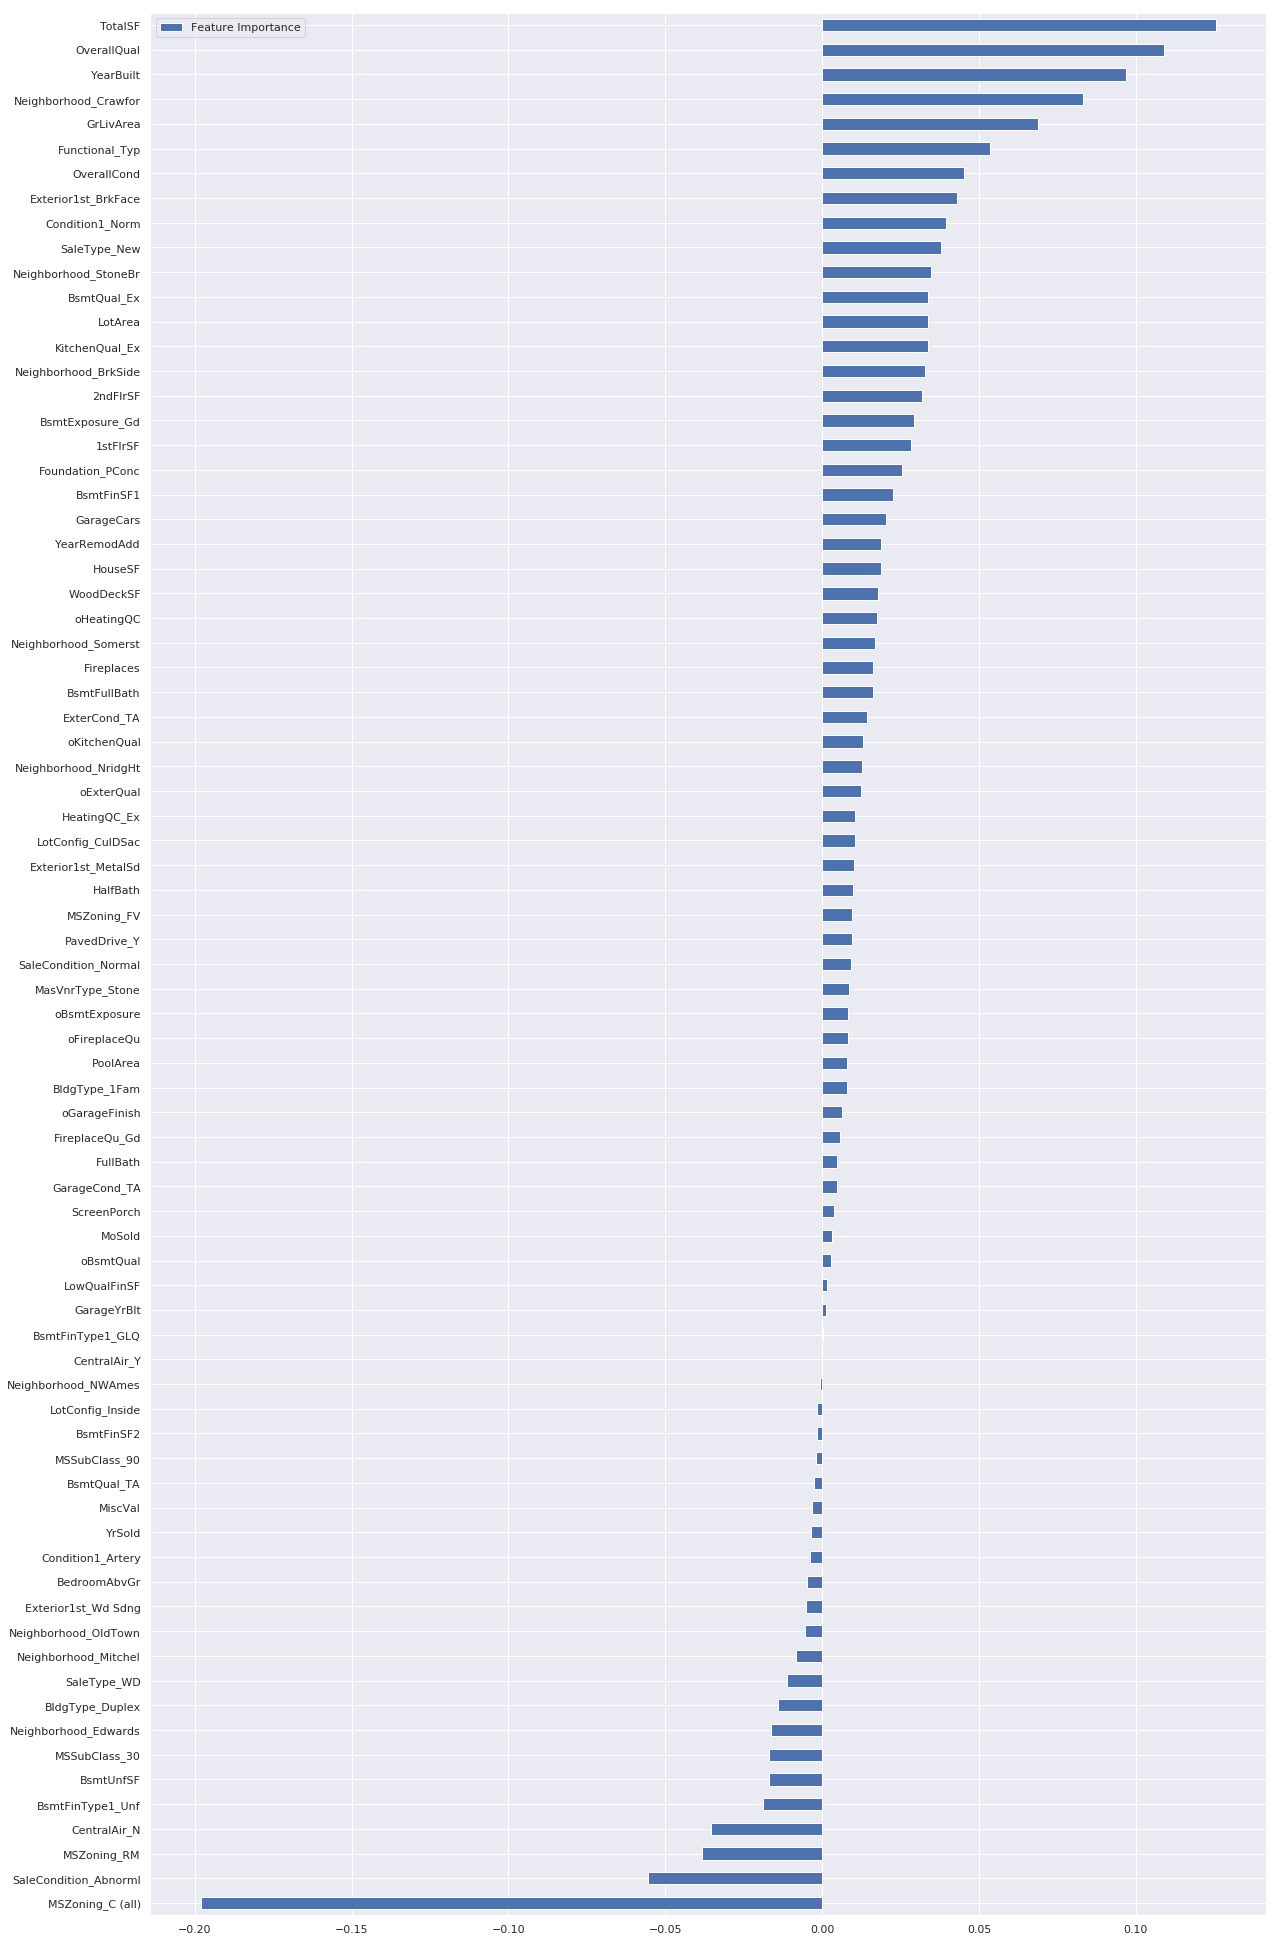

In [59]:
# Plot features by importance (feature coefficient in the model)
lassoCoeff[lassoCoeff["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(20,35))

What's intersting here is that two of the variables that we have created 'HouseSF' and 'PorchSF' perform actually bad compared to their components. But when we sum all the surfaces as in 'TotalSF', which is just a combination of features that are significantly unimportant in this model, we suddently obtain the most important feature in the dataset.

%%HTML
<h1>Principal Component Analysis</h1>

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance

In [60]:
from sklearn.decomposition import PCA
# Concatenate the training and test datasets into a single datafram
dataFull2 = np.concatenate([X_train_scaled,X_test_scaled])
# Choose the number of principle components such that 95% of the variance is retained
pca = PCA(0.95)
dataFull2 = pca.fit_transform(dataFull2)
varPCA = np.round(pca.explained_variance_ratio_*100, decimals = 1)
# Principal Component Analysis of data
print(varPCA)

[17.6  8.9  7.5  5.4  4.5  4.1  3.5  2.9  2.6  2.4  1.9  1.6  1.5  1.4
  1.2  1.2  1.1  1.1  1.   0.9  0.9  0.9  0.8  0.8  0.7  0.7  0.7  0.6
  0.6  0.6  0.6  0.5  0.5  0.5  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4
  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1]


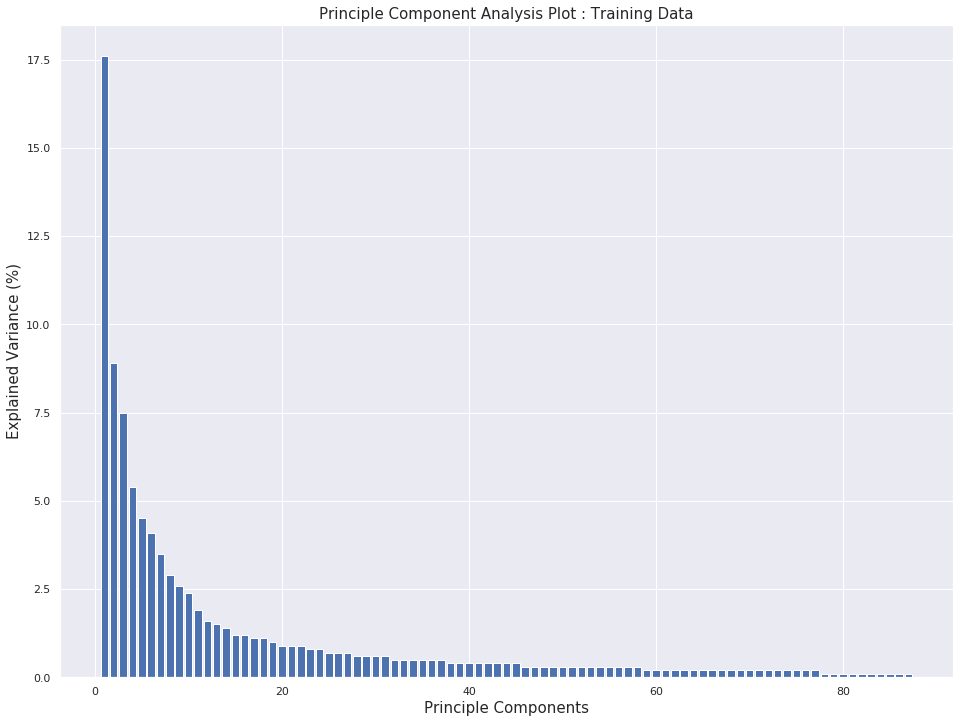

In [61]:
# Principal Component Analysis plot of the data
plt.figure(figsize=(16,12))
plt.bar(x=range(1,len(varPCA)+1), height = varPCA)
plt.ylabel("Explained Variance (%)", size = 15)
plt.xlabel("Principle Components", size = 15)
plt.title("Principle Component Analysis Plot : Training Data", size = 15)
plt.show()

In [62]:
# Shape of final data we will be working on
X_train_scaled = dataFull2[:train.shape[0]]
X_test_scaled = dataFull2[train.shape[0]:]
X_train_scaled.shape, y_train_transformed.shape, X_test_scaled.shape

((1458, 87), (1458,), (1459, 87))

We see that now we have 87 features instead of the 327 features that we had before using PCA.

%%HTML
<h1>Testing Different Models</h1>

Now that we have finished preparing our data, it's time to test different models to see which one performs the best. The models we will be testing are :

* Linear regression
* Support vector regression
* Stochastic gradient descent
* Gradient boosting tree
* Random forest
* Lasso regression
* Ridge regression
* Elastic net regularization
* Extra trees regression
* Kernel Ridge Regression
* Gradient Boosting Regression
* XGBoost 
* LightGBM

In [63]:
# importing the models
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso, SGDRegressor, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
warnings.filterwarnings('ignore')
# creating the models
models = [
             LinearRegression(),
             SVR(),
             SGDRegressor(),
             SGDRegressor(max_iter=1000, tol = 1e-3),
             GradientBoostingRegressor(),
             RandomForestRegressor(),
             Lasso(),
             Lasso(alpha=0.01,max_iter=10000),
             Ridge(),
             BayesianRidge(),
             KernelRidge(),
             KernelRidge(alpha=0.6,kernel='polynomial',degree = 2,coef0=2.5),
             ElasticNet(),
             ElasticNet(alpha = 0.001,max_iter=10000),    
             ExtraTreesRegressor(),
             ]

names = ['Linear regression','Support vector regression','Stochastic gradient descent','Stochastic gradient descent 2','Gradient boosting tree','Random forest','Lasso regression','Lasso regression 2','Ridge regression','Bayesian ridge regression','Kernel ridge regression','Kernel ridge regression 2','Elastic net regularization','Elastic net regularization 2','Extra trees regression']

In [64]:
# Define a root mean square error function
def rmse(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5))
    return rmse

In [65]:
from sklearn.model_selection import KFold,cross_val_score
warnings.filterwarnings('ignore')

# Perform 5-folds cross-calidation to evaluate the models 
for model, name in zip(models, names):
    # Root mean square error
    score = rmse(model,X_train_scaled,y_train_transformed)
    print("- {} : mean : {:.6f}, std : {:4f}".format(name, score.mean(),score.std()))

- Linear regression : mean : 0.117175, std : 0.005655
- Support vector regression : mean : 0.126343, std : 0.007533
- Stochastic gradient descent : mean : 0.210312, std : 0.016844
- Stochastic gradient descent 2 : mean : 0.151961, std : 0.020393
- Gradient boosting tree : mean : 0.133062, std : 0.007472
- Random forest : mean : 0.154195, std : 0.003849
- Lasso regression : mean : 0.397219, std : 0.017895
- Lasso regression 2 : mean : 0.136097, std : 0.006767
- Ridge regression : mean : 0.117089, std : 0.005650
- Bayesian ridge regression : mean : 0.116271, std : 0.005627
- Kernel ridge regression : mean : 12.861028, std : 0.182296
- Kernel ridge regression 2 : mean : 0.114503, std : 0.005634
- Elastic net regularization : mean : 0.260373, std : 0.014378
- Elastic net regularization 2 : mean : 0.116581, std : 0.005882
- Extra trees regression : mean : 0.153108, std : 0.007022


Surprisingly, the Random forest and Extra trees regression models are the ones who performed the worst, and the linear regression model performed actually pretty good relative to the other models. By compiling the above code several times and observing the different scores each time, we can classify the models by accuracy :

1st : Kernel ridge regression
2nd : Elastic net regularization and Bayesian ridge regression
3rd : Ridge regression and Linear regression
4rth : Support vector regression
5th : Gradient boosting tree
6th : Stochastic gradient and Lasso regression
7th : Random forest and Extra trees regression
I think we got a good score in Elastic net regularization, Lasso regression and Stochastic gradient descent because we chose some good parameters. We can see that their score above is very bad when not specifing parameter values. So if we really want to know to best model, we need to choose optimal parameters for all the models, and tha's what we will do in the next section.

%%HTML
<h1>Hyper-parameter Tuning</h1>

For choosing the most optimal hyper-parameters, we will perform gird search. the class GridSearchCV exhaustively considers all parameter combinations and generates candidates from a grid of parameter values specified with the param_grid parameter. Since we will use the same procedure for all models, we will start by creating a function which takes specified parameter values as entry.

In [66]:
from sklearn.model_selection import GridSearchCV

class gridSearch():
    def __init__(self,model):
        self.model = model
    def grid_get(self,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5,scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled,y_train_transformed)
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])
        print('\nBest parameters : {}, best score : {}'.format(grid_search.best_params_,np.sqrt(-grid_search.best_score_)))

1. Kernel ridge regression


In [75]:
gridSearch(KernelRidge()).grid_get(
        {'alpha':[3.5,4,4.5,5,5.5,6,6.5], 'kernel':["polynomial"], 'degree':[3],'coef0':[1,1.5,2,2.5,3,3.5]})

                                               params       ...        std_test_score
0   {'alpha': 3.5, 'coef0': 1, 'degree': 3, 'kerne...       ...              0.001855
1   {'alpha': 3.5, 'coef0': 1.5, 'degree': 3, 'ker...       ...              0.001368
2   {'alpha': 3.5, 'coef0': 2, 'degree': 3, 'kerne...       ...              0.001321
3   {'alpha': 3.5, 'coef0': 2.5, 'degree': 3, 'ker...       ...              0.001321
4   {'alpha': 3.5, 'coef0': 3, 'degree': 3, 'kerne...       ...              0.001330
5   {'alpha': 3.5, 'coef0': 3.5, 'degree': 3, 'ker...       ...              0.001340
6   {'alpha': 4, 'coef0': 1, 'degree': 3, 'kernel'...       ...              0.001949
7   {'alpha': 4, 'coef0': 1.5, 'degree': 3, 'kerne...       ...              0.001379
8   {'alpha': 4, 'coef0': 2, 'degree': 3, 'kernel'...       ...              0.001320
9   {'alpha': 4, 'coef0': 2.5, 'degree': 3, 'kerne...       ...              0.001318
10  {'alpha': 4, 'coef0': 3, 'degree': 3, 'kernel'... 

1. Elastic net regularization

In [76]:
gridSearch(ElasticNet()).grid_get(
        {'alpha':[0.006,0.0065,0.007,0.0075,0.008],'l1_ratio':[0.070,0.075,0.080,0.085,0.09,0.095],'max_iter':[10000]})

                                               params       ...        std_test_score
0   {'alpha': 0.006, 'l1_ratio': 0.07, 'max_iter':...       ...              0.001378
1   {'alpha': 0.006, 'l1_ratio': 0.075, 'max_iter'...       ...              0.001381
2   {'alpha': 0.006, 'l1_ratio': 0.08, 'max_iter':...       ...              0.001383
3   {'alpha': 0.006, 'l1_ratio': 0.085, 'max_iter'...       ...              0.001385
4   {'alpha': 0.006, 'l1_ratio': 0.09, 'max_iter':...       ...              0.001388
5   {'alpha': 0.006, 'l1_ratio': 0.095, 'max_iter'...       ...              0.001392
6   {'alpha': 0.0065, 'l1_ratio': 0.07, 'max_iter'...       ...              0.001381
7   {'alpha': 0.0065, 'l1_ratio': 0.075, 'max_iter...       ...              0.001383
8   {'alpha': 0.0065, 'l1_ratio': 0.08, 'max_iter'...       ...              0.001385
9   {'alpha': 0.0065, 'l1_ratio': 0.085, 'max_iter...       ...              0.001388
10  {'alpha': 0.0065, 'l1_ratio': 0.09, 'max_iter'... 

Ridge regression

In [77]:
gridSearch(Ridge()).grid_get(
        {'alpha':[10,20,25,30,35,40,45,50,55,57,60,65,70,75,80,100],'max_iter':[10000]})

                               params       ...        std_test_score
0    {'alpha': 10, 'max_iter': 10000}       ...              0.001337
1    {'alpha': 20, 'max_iter': 10000}       ...              0.001328
2    {'alpha': 25, 'max_iter': 10000}       ...              0.001325
3    {'alpha': 30, 'max_iter': 10000}       ...              0.001323
4    {'alpha': 35, 'max_iter': 10000}       ...              0.001321
5    {'alpha': 40, 'max_iter': 10000}       ...              0.001320
6    {'alpha': 45, 'max_iter': 10000}       ...              0.001318
7    {'alpha': 50, 'max_iter': 10000}       ...              0.001317
8    {'alpha': 55, 'max_iter': 10000}       ...              0.001317
9    {'alpha': 57, 'max_iter': 10000}       ...              0.001316
10   {'alpha': 60, 'max_iter': 10000}       ...              0.001316
11   {'alpha': 65, 'max_iter': 10000}       ...              0.001316
12   {'alpha': 70, 'max_iter': 10000}       ...              0.001316
13   {'alpha': 75, '

Support vector regression

In [78]:
gridSearch(SVR()).grid_get(
        {'C':[13,15,17,19,21],'kernel':["rbf"],"gamma":[0.0005,0.001,0.002,0.01],"epsilon":[0.01,0.02,0.03,0.1]})

                                               params       ...        std_test_score
0   {'C': 13, 'epsilon': 0.01, 'gamma': 0.0005, 'k...       ...              0.001739
1   {'C': 13, 'epsilon': 0.01, 'gamma': 0.001, 'ke...       ...              0.001564
2   {'C': 13, 'epsilon': 0.01, 'gamma': 0.002, 'ke...       ...              0.001498
3   {'C': 13, 'epsilon': 0.01, 'gamma': 0.01, 'ker...       ...              0.001937
4   {'C': 13, 'epsilon': 0.02, 'gamma': 0.0005, 'k...       ...              0.001548
5   {'C': 13, 'epsilon': 0.02, 'gamma': 0.001, 'ke...       ...              0.001482
6   {'C': 13, 'epsilon': 0.02, 'gamma': 0.002, 'ke...       ...              0.001519
7   {'C': 13, 'epsilon': 0.02, 'gamma': 0.01, 'ker...       ...              0.001954
8   {'C': 13, 'epsilon': 0.03, 'gamma': 0.0005, 'k...       ...              0.001498
9   {'C': 13, 'epsilon': 0.03, 'gamma': 0.001, 'ke...       ...              0.001393
10  {'C': 13, 'epsilon': 0.03, 'gamma': 0.002, 'ke... 

Lasso regression

In [79]:
gridSearch(Lasso()).grid_get(
       {'alpha':[0.01,0.001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009],'max_iter':[10000]})

                                  params       ...        std_test_score
0     {'alpha': 0.01, 'max_iter': 10000}       ...              0.001869
1    {'alpha': 0.001, 'max_iter': 10000}       ...              0.001428
2   {'alpha': 0.0001, 'max_iter': 10000}       ...              0.001362
3   {'alpha': 0.0002, 'max_iter': 10000}       ...              0.001371
4   {'alpha': 0.0003, 'max_iter': 10000}       ...              0.001380
5   {'alpha': 0.0004, 'max_iter': 10000}       ...              0.001389
6   {'alpha': 0.0005, 'max_iter': 10000}       ...              0.001398
7   {'alpha': 0.0006, 'max_iter': 10000}       ...              0.001410
8   {'alpha': 0.0007, 'max_iter': 10000}       ...              0.001422
9   {'alpha': 0.0008, 'max_iter': 10000}       ...              0.001433
10  {'alpha': 0.0009, 'max_iter': 10000}       ...              0.001434

[11 rows x 3 columns]

Best parameters : {'alpha': 0.0006, 'max_iter': 10000}, best score : 0.11674669488352589


We see that the models perform almost the same way with a score of 0.116. Let's define these models with the their respective best hyper-parameters.

In [80]:
lasso = Lasso(alpha= 0.0006, max_iter= 10000)
ridge = Ridge(alpha=35, max_iter= 10000)
svr = SVR(C = 13, epsilon= 0.03, gamma = 0.001, kernel = 'rbf')
ker = KernelRidge(alpha=6.5 ,kernel='polynomial', degree=3 , coef0=2.5)
ela = ElasticNet(alpha=0.007,l1_ratio=0.07,max_iter=10000)
bay = BayesianRidge()

In [81]:
%%HTML
<h1>Combining Models</h1>

In order to further improve our model accuracy. We will use an ensemble method. I chose to use stacking. Stacked generalization is an ensemble method where the models are combined using another machine learning algorithm. The basic idea is to train machine learning algorithms with training dataset and then generate a new dataset with these models. Then this new dataset is used as input for the combiner machine learning algorithm.

In [83]:
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
# Creating the stacking function
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        kff = KFold(n_splits=5, random_state=42, shuffle=True)
        self.kf = kff
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [84]:
# Impute the training dataset
X_scaled_imputed = Imputer().fit_transform(X_train_scaled)
y_log_imputed = Imputer().fit_transform(y_train_transformed.values.reshape(-1,1)).ravel()

X_scaled_imputed.shape,y_log_imputed.shape,X_test_scaled.shape

((1458, 87), (1458,), (1459, 87))

In [85]:
# Calculating the score
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)
score = rmse(stack_model,X_scaled_imputed,y_log_imputed)
print(score.mean())

0.11306074133203588


We obtain a score of 0.113, which is slightly better than the average score of the other models

In [86]:
# Combining the extracted features generated from stacking whith original features
X_train_stack,X_test_stack = stack_model.get_oof(X_scaled_imputed,y_log_imputed,X_test_scaled)
X_train_add = np.hstack((X_scaled_imputed,X_train_stack))
X_test_add = np.hstack((X_test_scaled,X_test_stack))
X_train_add.shape,X_test_add.shape

((1458, 93), (1459, 93))

In [87]:
# Calculate the final score of the model
score = rmse(stack_model,X_train_add,y_log_imputed)
print(score.mean())

0.10746640419370448


The last score we obtain is 0.1074, which is quite good

%%HTML
<h1>Making Predictions</h1>

Now it's time to make predictions and store them in a csv file with corresponding Ids. after we make prediction we need to transform them to their original shape with exponential function

In [88]:
# Fit the model to the dataset generated with stacking
stack_model.fit(X_train_add,y_log_imputed)

stacking(meta_model=KernelRidge(alpha=6.5, coef0=2.5, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None),
     mod=[Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=35, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, random_state=N...True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)])

In [96]:
# Making prediction on the test set generated by stacking
predicted_prices = np.exp(stack_model.predict(X_test_add))
print(predicted_prices.shape)
#print(test_ID)
# Prepare the csv file
my_submission = pd.DataFrame({'Id': test_ID, 'SalePrice': predicted_prices})
#my_submission.to_csv('submission.csv', index=False)

(1459,)


%%HTML
<h1>Other Way to Predication</h1>
Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [97]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train_scaled,y_train_transformed, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [98]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

%%HTML
<h1>Base models</h1>

**LASSO Regression :**
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline[](http://)

In [99]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

**Elastic Net Regression :**
again made robust to outliers

In [100]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

**Kernel Ridge Regression :**



In [101]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

**Gradient Boosting Regression :**
With huber loss that makes it robust to outliers

In [102]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

**XGBoost :**

In [103]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

**LightGBM :**

In [104]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

**Base models scores¶**

Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [105]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1169 (0.0058)



In [106]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1169 (0.0058)



In [107]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1145 (0.0056)



In [108]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1477 (0.0101)



**XGB**

In [109]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1286 (0.0091)



**LGBM**

In [110]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1397 (0.0087)



%%HTML
<h1>Stacking models</h1>

**Simplest Stacking approach : Averaging base models**

We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

**Averaged base models class**

In [111]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

**Averaged base models score**

The last time I submitted, I was the 859th (top 20%) with a score of 0.11934

We just average four models here** ENet, GBoost, KRR and lasso**. Of course we could easily add more models in the mix.

In [112]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1169 (0.0071)



Wow ! It seems even the simplest stacking approach really improve the score . This encourages us to go further and explore a less simple stacking approch.

**Less simple Stacking : Adding a Meta-model¶**

In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

* The procedure, for the training part, may be described as follows:

* Split the total training set into two disjoint sets (here train and .holdout )
 
* Train several base models on the first part (train)
 
* Test these base models on the second part (holdout)

Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

**Stacking averaged Models Class**

In [113]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

**Stacking Averaged models Score**

To make the two approaches comparable (by using the same number of models) , we just average Enet KRR and Gboost, then we add lasso as meta-model.

In [115]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

print(stacked_averaged_models)
#score = rmsle_cv(stacked_averaged_models)
#print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))



StackingAveragedModels(base_models=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=...nelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)),
            meta_model=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))]),
            n_folds=5)


**Ensembling StackedRegressor, XGBoost and LightGBM¶**

We add **XGBoost** and **LightGBM** to the StackedRegressor defined previously.
We first define a rmsle evaluation function

In [116]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

**Final Training and Prediction**

**StackedRegressor:**

In [117]:

stacked_averaged_models.fit(X_train_scaled,y_train_transformed)
stacked_train_pred = stacked_averaged_models.predict(X_train_scaled)
#stacked_pred = np.expm1(stacked_averaged_models.predict(y_train_transformed))
#print(rmsle(y_train_transformed, stacked_train_pred))

We get again a better score by adding a meta learner

**Ensembling StackedRegressor, XGBoost and LightGBM¶**

We add **XGBoost** and **LightGBM** to the StackedRegressor defined previously.

We first define a rmsle evaluation function

In [118]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

**Final Training and Prediction**

**StackedRegressor:**

In [119]:
stacked_averaged_models.fit(X_train_scaled, y_train_transformed)
stacked_train_pred = stacked_averaged_models.predict(X_train_scaled)
stacked_pred = np.expm1(stacked_averaged_models.predict(X_test_scaled))
print(rmsle(y_train_transformed, stacked_train_pred))

0.0931796626359325


**XGBoost:**

In [120]:
model_xgb.fit(X_train_scaled, y_train_transformed)
xgb_train_pred = model_xgb.predict(X_train_scaled)
xgb_pred = np.expm1(model_xgb.predict(X_test_scaled))
print(rmsle(y_train_transformed, xgb_train_pred))


0.06669490076687049


**LightGBM:***

In [121]:
model_lgb.fit(X_train_scaled, y_train_transformed)
lgb_train_pred = model_lgb.predict(X_train_scaled)
lgb_pred = np.expm1(model_lgb.predict(X_test_scaled))
print(rmsle(y_train_transformed, lgb_train_pred))

0.06147600484410939


**'''RMSE on the entire Train data when averaging'''**

In [123]:
print('RMSLE score on train data:')
print(rmsle(y_train_transformed,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.08187355791495829


**Ensemble prediction:**

In [124]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

**Submission******

In [125]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)